In [ ]:
from sys import exit, path
import os
import matplotlib.pyplot as plt

import a custom libray to read the *.mat file generated from Dymola

In [2]:
import DyMat

set the current dirctory 

In [24]:
os.chdir(current directory path)
resPath = os.getcwd()

start dymola instance

In [4]:
path.append(r'C:\Program Files\Dymola 2020x\Modelica\Library\python_interface\dymola.egg')

from dymola.dymola_interface import DymolaInterface
from dymola.dymola_exception import DymolaException
# Instantiate the Dymola interface and start Dymola
dymola = DymolaInterface()

open a custom library (for modelica this is not required)

In [6]:
result = dymola.openModel(r'your library path\Dymola_Introduction.mo')

set the current directory for dymola. every function can be run like this

In [17]:
result = dymola.ExecuteCommand("Modelica.Utilities.System.setWorkDirectory(\"C:/Path/tmp\")")

simulate a model in the custom library. The format is the same as simulateModel funciton in dymola command prompt

In [18]:
modelName = 'Dymola_Introduction.Motor'
resultFile = 'Motor'
result = dymola.simulateModel(modelName, stopTime=3, method="dassl", resultFile=resultFile)

this line is only for information (to test the current directory)

In [ ]:
dymola.ExecuteCommand("Modelica.Utilities.System.getWorkDirectory()")

read the result *.mat file specifying the file path (this is not a dymola function but a custom python file)

In [28]:
res = DyMat.DymolaMat(fileName = os.path.join(resPath , resultFile))

list all the variables in the model

In [ ]:
#res.names()

get the results including time (you may need to get time in different way. look at the python file)

In [29]:
Time = res.abscissa(2)[0]

In [31]:
load = res.data('load.tau')

plot the result in python

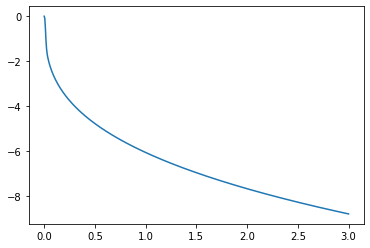

In [32]:
plt.plot(Time, res.data('load.tau'))

close dymola instance

In [ ]:
dymola.close()